In [171]:
import re
from collections import Counter
import pandas as pd
import os
import spacy
import numpy as np
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
%matplotlib inline

#### **Датасет SemEval_2022_Task_11**

In [2]:
lpath = 'z:\\ИТЦ ФАС\\Обучение\\Innopolis Data Science\\From Linux\\innopolis\\DZ_diplom\\datasets\\SemEval_2022_Task_11\\RU-Russian\\'

In [3]:
with open(lpath+'ru_train.conll', 'r', encoding='utf8') as f:
    lines = f.read().split('\n')
    f.close()

In [4]:
len(lines)

272985

In [5]:
lines[:30]

['# id 11b11e4f-73c6-4e3d-babd-0de83e450861\tdomain=train',
 'российская _ _ B-GRP',
 'экологическая _ _ I-GRP',
 'партия _ _ I-GRP',
 '«зелёные» _ _ I-GRP',
 '— _ _ O',
 'до _ _ O',
 'февраля _ _ O',
 '2012 _ _ O',
 'года _ _ O',
 ', _ _ O',
 'входила _ _ O',
 'в _ _ O',
 'состав _ _ O',
 'партии _ _ O',
 'ср _ _ O',
 '',
 '# id ab534372-f9b2-479b-8bc8-af042426b422\tdomain=train',
 'также _ _ O',
 'посещал _ _ O',
 'два _ _ O',
 'семинара _ _ O',
 'бартольда _ _ B-PER',
 'кёйкена _ _ I-PER',
 'по _ _ O',
 'интерпретации _ _ O',
 'музыки _ _ O',
 'баха _ _ B-PER',
 'и _ _ O',
 'телемана _ _ B-PER']

In [6]:
lines[-30:]

['',
 '# id d6cd4484-9a8a-40de-af6d-dae421fc9078\tdomain=domain_adapt',
 'поэтическая _ _ B-CW',
 'драма _ _ I-CW',
 'установить _ _ O',
 'окна _ _ O',
 '',
 '# id b0227921-eb5d-4199-96ed-d1ab45b62e4d\tdomain=domain_adapt',
 'статус _ _ O',
 'рейса _ _ O',
 'имперская _ _ B-CORP',
 'британская _ _ I-CORP',
 'восточно-африканская _ _ I-CORP',
 'компания _ _ I-CORP',
 '',
 '# id 4a475e29-8175-4015-bcde-70c7e54c2b3e\tdomain=domain_adapt',
 'свинья _ _ O',
 'шейх-хасан _ _ B-LOC',
 '',
 '# id 14ed5aac-5e7b-40c4-9639-999a3a3f349c\tdomain=domain_adapt',
 'pa _ _ O',
 'хевеш _ _ B-LOC',
 '(город) _ _ I-LOC',
 '',
 '# id 79fc8906-a4ea-4614-a0ad-ce5d73ac46d4\tdomain=domain_adapt',
 'что _ _ O',
 'означает _ _ O',
 'жолкудук _ _ B-LOC',
 '',
 '']

In [7]:
def get_expr(aregex, atext):
    lwords, lmarkers, lsent = [],[],[]
    k = 0
    for s in atext:
        matches = re.finditer(aregex, s, re.MULTILINE)
        for matchNum, match in enumerate(matches, start=1):
            if len(match.groups())==2:
                lwords.append(match.group(1).strip())
                lmarkers.append(match.group(2).strip())
                lsent.append(k)
        if bool(re.search("^# id", s)): 
            k+=1
    ldf = pd.DataFrame({'words': lwords, 'markers': lmarkers, 'sentense_num': lsent})
    return ldf

In [8]:
fdf = get_expr(r"(.+?)_ _ (.+?)$", lines)

In [9]:
fdf[-30:]

,words,markers,sentense_num
242354,значение,O,15291
242355,ключ,O,15292
242356,ояш,B-LOC,15292
242357,(село),I-LOC,15292
242358,решетникова,B-LOC,15293
242359,дмв,O,15293
242360,cls,O,15294
242361,блумфилд-хилс,B-LOC,15294
242362,йэшлек,B-GRP,15295
242363,офис,O,15295


In [149]:
c = Counter(word for word in fdf.words)

In [150]:
c.most_common()[-50:]

[('гарн', 1),
 ('infinitum', 1),
 ('nihil', 1),
 ('ремонтные', 1),
 ('мной', 1),
 ('8g', 1),
 ('пальмирена', 1),
 ('маршрутизации', 1),
 ('ла́душкин', 1),
 ('nice', 1),
 ('work', 1),
 ('francois', 1),
 ('botha', 1),
 ('барда', 1),
 ('(река)', 1),
 ('бортников', 1),
 ('о’брайан,', 1),
 ('рональд', 1),
 ('оракул', 1),
 ('каттым-еган', 1),
 ('пул', 1),
 ('беар', 1),
 ('эспанол', 1),
 ('c5-03', 1),
 ('жив', 1),
 ('whites', 1),
 ('off', 1),
 ('now!!', 1),
 ('gods', 1),
 ('ip', 1),
 ('валентино', 1),
 ('1977)', 1),
 ('bliss', 1),
 ('(песня)', 1),
 ('ояш', 1),
 ('(село)', 1),
 ('решетникова', 1),
 ('дмв', 1),
 ('cls', 1),
 ('блумфилд-хилс', 1),
 ('финансовой', 1),
 ('поэтическая', 1),
 ('имперская', 1),
 ('восточно-африканская', 1),
 ('свинья', 1),
 ('шейх-хасан', 1),
 ('pa', 1),
 ('хевеш', 1),
 ('(город)', 1),
 ('жолкудук', 1)]

In [185]:
c = Counter(m for m in fdf.markers)

Title pretty much sums up the question. I've noticed that in some papers people have referred to a BILOU encoding scheme for NER as opposed to the typical BIO tagging scheme (Such as this paper by Ratinov and Roth in 2009 http://cogcomp.cs.illinois.edu/page/publication_view/199)

From working with the 2003 CoNLL data I know that

B stands for 'beginning' (signifies beginning of an NE)
I stands for 'inside' (signifies that the word is inside an NE)
O stands for 'outside' (signifies that the word is just a regular word outside of an NE)

**While I've been told that the words in BILOU stand for**

B - 'beginning'
I - 'inside'
L - 'last'
O - 'outside'
U - 'unit'

I've also seen people reference another tag

E - 'end', use it concurrently with the 'last' tag
S - 'singleton', use it concurrently with the 'unit' tag


**In this task, we focus on the following six entity types:**

PER : Person
LOC : Location
GRP : Group
CORP : Corporation
PROD : Product
CW: Creative Work

In [186]:
c.most_common()

[('O', 208855),
 ('B-LOC', 4219),
 ('I-PER', 3982),
 ('B-PER', 3683),
 ('I-CW', 3399),
 ('B-CW', 3224),
 ('B-GRP', 2976),
 ('B-PROD', 2921),
 ('B-CORP', 2817),
 ('I-GRP', 2711),
 ('I-CORP', 1914),
 ('I-PROD', 942),
 ('I-LOC', 740),
 ('_ O', 1)]

In [168]:
208855/242383*100

86.16734671986072

In [376]:
fdf.loc[fdf.markers=='_ O','markers']='O'

In [377]:
fdf[(fdf.markers=='_ O')]

,words,markers,sentense_num,word_idx,marker_idx


In [378]:
c = Counter(m for m in fdf.markers)

In [379]:
c.most_common()

[('O', 208856),
 ('B-LOC', 4219),
 ('I-PER', 3982),
 ('B-PER', 3683),
 ('I-CW', 3399),
 ('B-CW', 3224),
 ('B-GRP', 2976),
 ('B-PROD', 2921),
 ('B-CORP', 2817),
 ('I-GRP', 2711),
 ('I-CORP', 1914),
 ('I-PROD', 942),
 ('I-LOC', 740)]

In [261]:
fdf[(fdf.markers=='B-PROD')|(fdf.markers=='I-PROD')][-30:]

,words,markers,sentense_num
240741,форд,B-PROD,15124
240742,рейнджер,I-PROD,15124
240913,пива,B-PROD,15134
240923,патронов,B-PROD,15135
241070,крови,B-PROD,15146
241234,изумруд,B-PROD,15157
241297,настольных,B-PROD,15161
241298,игр,I-PROD,15161
241405,playstation,B-PROD,15166
241406,3,I-PROD,15166


In [187]:
named_df =  fdf[(fdf.markers!='O') & (fdf.markers!='_ O')]

In [188]:
c = Counter(word for word in zip(named_df.words, named_df.markers))

In [190]:
c.most_common()[:30]

[(('и', 'I-CW'), 93),
 (('орден', 'B-GRP'), 90),
 (('rotten', 'B-CORP'), 74),
 (('tomatoes', 'I-CORP'), 74),
 (('records', 'I-CORP'), 70),
 (('а.', 'B-PER'), 58),
 (('орденом', 'B-GRP'), 55),
 (('i', 'I-PER'), 54),
 (('университета', 'I-GRP'), 53),
 (('университете', 'I-GRP'), 51),
 (('the', 'B-GRP'), 49),
 (('of', 'I-CW'), 48),
 (('в', 'I-CW'), 47),
 (('париж', 'B-LOC'), 45),
 (('области', 'I-LOC'), 45),
 (('де', 'I-PER'), 41),
 (('ii', 'I-PER'), 40),
 (('святого', 'I-GRP'), 39),
 (('playstation', 'B-PROD'), 39),
 (('the', 'I-CW'), 39),
 (('dvd', 'B-PROD'), 39),
 (('университет', 'I-GRP'), 36),
 (('в.', 'B-PER'), 35),
 (('радио', 'B-CORP'), 34),
 (('the', 'B-CW'), 34),
 (('сша', 'I-GRP'), 34),
 (('mtv', 'B-CORP'), 33),
 (('а.', 'I-PER'), 33),
 (('юнайтед', 'I-GRP'), 31),
 (('германии', 'B-LOC'), 31)]

**Грузим тестовые данные**

In [10]:
with open(lpath+'ru_dev.conll', 'r', encoding='utf8') as f:
    lines = f.read().split('\n')
    f.close()

In [11]:
len(lines)

14388

In [12]:
lines[:30]

['# id 01997b3e-1ab7-431f-a461-309a8226586a\tdomain=dev',
 'важным _ _ O',
 'традиционным _ _ O',
 'промыслом _ _ O',
 'является _ _ O',
 'производство _ _ O',
 'пальмового _ _ B-PROD',
 'масла _ _ I-PROD',
 '. _ _ O',
 '',
 '# id 509dd435-8400-43e4-be52-b65c299ca703\tdomain=dev',
 'он _ _ O',
 'вышел _ _ O',
 'в _ _ O',
 'нескольких _ _ O',
 'томах _ _ O',
 'между _ _ O',
 '1838 _ _ O',
 'и _ _ O',
 '1849 _ _ O',
 'годами _ _ O',
 ', _ _ O',
 'первые _ _ O',
 'тома _ _ O',
 'были _ _ O',
 'посвящены _ _ O',
 'материалам _ _ O',
 ', _ _ O',
 'связанным _ _ O',
 'с _ _ O']

In [13]:
lines[-30:]

['. _ _ O',
 '',
 '# id 146d9b97-1bdc-4dab-8280-8585c91a479b\tdomain=dev',
 'в _ _ O',
 'сентябре _ _ O',
 '1834 _ _ O',
 'года _ _ O',
 'поступил _ _ O',
 'в _ _ O',
 'королевский _ _ O',
 'академический _ _ O',
 'институт _ _ O',
 'белфаст _ _ B-LOC',
 '. _ _ O',
 '',
 '# id 3daebd44-9f10-4d78-ae44-09837e213f8e\tdomain=dev',
 'через _ _ O',
 'несколько _ _ O',
 'дней _ _ O',
 'он _ _ O',
 'подписал _ _ O',
 'контракт _ _ O',
 'с _ _ O',
 '« _ _ O',
 'мемфис _ _ B-GRP',
 'гриззлис _ _ I-GRP',
 '» _ _ O',
 '. _ _ O',
 '',
 '']

In [14]:
fdf_test = get_expr(r"(.+?)_ _ (.+?)$", lines)

In [15]:
fdf_test

,words,markers,sentense_num
0,важным,O,1
1,традиционным,O,1
2,промыслом,O,1
3,является,O,1
4,производство,O,1
...,...,...,...
12782,«,O,800
12783,мемфис,B-GRP,800
12784,гриззлис,I-GRP,800
12785,»,O,800


In [359]:
c = Counter(m for m in fdf_test.markers)

In [360]:
c.most_common()

[('O', 11020),
 ('B-LOC', 221),
 ('I-PER', 194),
 ('B-PER', 192),
 ('I-CW', 180),
 ('B-CW', 168),
 ('B-CORP', 159),
 ('B-PROD', 151),
 ('B-GRP', 151),
 ('I-GRP', 142),
 ('I-CORP', 121),
 ('I-PROD', 56),
 ('I-LOC', 32)]

#### **Датасет SlavNER_3rd_Shared_Task**

In [211]:
fpath = r'z:\ИТЦ ФАС\Обучение\Innopolis Data Science\From Linux\innopolis\DZ_diplom\datasets\SlavNER_3rd_Shared_Task\training_pl_cs_ru_bg_rc1\annotated\ru'
files = os.listdir(path)

In [241]:
ldf = pd.DataFrame(columns = ['word','word2','marker','eng'])
for file in files:
    with open(os.path.join(fpath,file), 'r', encoding='utf8') as f:
        lines = f.read().split('\n')
        f.close()
    for i in range(1, len(lines)-1):
        ldf.loc[ldf.shape[0]] = lines[i].split('\t')

In [242]:
len(files)

178

In [243]:
len(ldf)

3193

In [246]:
ldf[ldf.word!=ldf.word2]

,word,word2,marker,eng
0,Асии Биби,Асия Биби,PER,PER-Asia-Bibi
3,Верховным судом,Верховный суд,ORG,ORG-Supreme-Court-of-Pakistan
8,Мухаммеда,Мухаммед,PER,PER-Prophet-Muhammad
9,Пакистане,Пакистан,LOC,GPE-Pakistan
15,Сакибу Нисару,Сакиб Нисар,PER,PER-Mian-Saqib-Nisar
...,...,...,...,...
3185,Терезы Мэй,Тереза Мэй,PER,PER-Theresa-May
3186,"Федеральной службе по надзору в сфере связи, и...","Федеральная служба по надзору в сфере связи, и...",ORG,ORG-Federal Service for Supervision of Communi...
3188,Юлии,Юлия,PER,PER-Yulia-Skripal
3190,британского,британский,LOC,GPE-Great-Britain


In [247]:
c = Counter(word for word in ldf.word)

In [249]:
c.most_common()[:40]

[('Великобритании', 99),
 ('ЕС', 88),
 ('Brexit', 87),
 ('Дэвид Дэвис', 66),
 ('Бориса Джонсона', 63),
 ('Борис Джонсон', 60),
 ('Мэй', 58),
 ('Тереза Мэй', 58),
 ('Евросоюза', 57),
 ('Пакистане', 51),
 ('Терезы Мэй', 50),
 ('Пакистана', 46),
 ('Биби', 43),
 ('Джонсона', 42),
 ('Асии Биби', 40),
 ('Британии', 37),
 ('Джонсон', 36),
 ('Доминик Рааб', 32),
 ('Дэвис', 31),
 ('МИД Великобритании', 29),
 ('МИД', 27),
 ('Асия Биби', 26),
 ('Мухаммеда', 25),
 ('Дэвида Дэвиса', 25),
 ('Дэвиса', 25),
 ('Лондона', 24),
 ('Асию Биби', 22),
 ('Верховный суд Пакистана', 22),
 ('Евросоюзом', 22),
 ('Терезой Мэй', 21),
 ('Верховного суда', 19),
 ('Брюсселем', 18),
 ('Великобритания', 18),
 ('Бориса', 16),
 ('Рааб', 16),
 ('REGNUM', 15),
 ('США', 15),
 ('Доминика Рааба', 15),
 ('Даунинг-стрит', 15),
 ('Англии', 15)]

In [250]:
c = Counter(word for word in ldf.marker)

**five types of named entities:**

persons,
locations,
organizations,
events,
products.

In [251]:
c.most_common()

[('PER', 1313), ('ORG', 837), ('LOC', 739), ('EVT', 188), ('PRO', 116)]

In [255]:
ldf[ldf.marker=='PRO']

,word,word2,marker,eng
124,Facebook,Facebook,PRO,PRO-Facebook
134,Коран,Коран,PRO,PRO-The-Quran
135,Корана,Коран,PRO,PRO-The-Quran
192,Лента.ру,Лента.ру,PRO,PRO-Lenta-Ru
204,Корана,Коран,PRO,PRO-The-Quran
...,...,...,...,...
3144,ВВС,ВВС,PRO,PRO-BBC-website
3161,Sky News,Sky News,PRO,PRO-Sky-News-TV
3162,«NTV.RU»,«NTV.RU»,PRO,PRO-NTV
3175,НТВ,НТВ,PRO,PRO-NTV


#### **Подгоняем токенизацию**

In [268]:
! python -m spacy download ru_core_news_sm

2021-12-02 22:51:05.316110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-02 22:51:05.316913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
You should consider upgrading via the 'C:\Python\ENV\innopolis\Scripts\python.exe -m pip install --upgrade pip' command.



  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=92eac562493deec902049d0a17b85c1f5a08c9ae895d75b6b4521d72c759ee05
  Stored in directory: c:\users\eka\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [225]:
nlp = spacy.load("ru_core_news_sm")

In [17]:
def ltokenize(asent):
    doc = nlp(asent)
    for token in doc:
        print(token, token.pos_, token.dep_)
    return doc

In [143]:
fdf[fdf.words=="(река)"]

,words,markers,sentense_num
242305,(река),I-LOC,15280


In [144]:
fdf[fdf.sentense_num==15280]

,words,markers,sentense_num
242304,барда,B-LOC,15280
242305,(река),I-LOC,15280
242306,офис,O,15280
242307,шерифа,O,15280
242308,округа,O,15280


In [145]:
ls = ' '.join(fdf[fdf.sentense_num==15280].words)

In [ ]:
ls = u'Российская экологическая партия «Зелёные» — до февраля 2012 года, входила в состав партии СР.'

In [322]:
ls = 'Иоанн Павел II внёс некоторые изменения в правила проведения конклавов.'

In [315]:
ls = 'В 1977 году окончил исторический факультет Запорожского государственного педагогического института.'

In [327]:
ls = 'Куно I фон Ротт — пфальцграф Баварии, граф Фобурга, граф Нижнего Изара.'

In [350]:
ls = '— Гаев — «Вишнёвый сад», по пьесе А. П. Чехова, реж.'

In [133]:
ls = 'whites off earth now!! вики'

In [141]:
ls = 'смерть о’брайан, рональд кларк'

In [147]:
ls = 'барда (река) офис шерифа округа'

In [148]:
ldoc = ltokenize(ls)

барда NOUN nsubj
( PUNCT punct
река NOUN appos
) PUNCT punct
офис NOUN ROOT
шерифа NOUN nmod
округа NOUN nmod


In [142]:
ldoc = ltokenize(ls)

смерть NOUN ROOT
о’брайан PROPN nmod
, PUNCT punct
рональд PROPN conj
кларк PROPN flat:name


In [134]:
ldoc = ltokenize(ls)

whites X ROOT
off X flat:foreign
earth X flat:foreign
now X flat:foreign
! PUNCT punct
! PUNCT punct
вики NOUN ROOT


In [351]:
ldoc = ltokenize(ls)

— PUNCT punct
Гаев PROPN nsubj
— PUNCT punct
« PUNCT punct
Вишнёвый ADJ amod
сад NOUN ROOT
» PUNCT punct
, PUNCT punct
по ADP case
пьесе NOUN conj
А. PROPN nmod
П. PROPN flat:name
Чехова PROPN flat:name
, PUNCT punct
реж NOUN conj
. PUNCT punct


In [317]:
spacy.explain('ADP')

'adposition'

In [352]:
ldoc[1].vector

array([-0.15088378, -0.54684824, -0.9238066 ,  1.0568125 ,  0.5398472 ,
        0.02997024,  1.3314238 ,  0.9960133 , -1.2179492 , -0.9747461 ,
        0.4893977 ,  0.04323094,  0.754324  , -0.8644272 , -0.18096948,
        0.67915416,  0.3041162 ,  0.2299924 ,  0.57019395,  1.3187566 ,
       -0.38588908, -0.88329256, -0.91332185, -0.01493233, -0.5173516 ,
       -0.7581314 ,  0.8646259 , -0.48270148, -0.71458685,  0.24038637,
        0.02487998,  0.2599171 ,  0.08873704,  0.3083642 ,  1.7474169 ,
       -0.37637758,  0.34154785, -1.9041159 ,  0.9965748 ,  0.44928363,
       -0.22731608, -0.46921015, -1.5062906 , -0.26387632, -1.593091  ,
       -0.33843   ,  1.6264466 , -0.9873369 ,  0.2793551 ,  0.3358706 ,
       -0.7336711 , -0.9600396 ,  0.54485095, -1.1470025 , -0.59627616,
        0.68997943, -0.2976028 , -0.59218335, -0.9338236 , -0.71751076,
       -0.7155106 ,  0.08024211, -0.80225325, -0.68195987, -0.9824893 ,
        0.35127306,  2.6796863 , -0.8557567 , -0.10602969,  0.29

In [87]:
ldoc2 = ltokenize('— Гаев — «Вишнёвый сад»')

— PUNCT punct
Гаев PROPN ROOT
— PUNCT punct
« PUNCT punct
Вишнёвый ADJ amod
сад NOUN appos
» PUNCT punct


In [88]:
ldoc2[1].vector

array([-0.15088378, -0.54684824, -0.9238066 ,  1.0568125 ,  0.5398472 ,
        0.02997024,  1.3314238 ,  0.9960133 , -1.2179492 , -0.9747461 ,
        0.4893977 ,  0.04323094,  0.754324  , -0.8644272 , -0.18096948,
        0.67915416,  0.3041162 ,  0.2299924 ,  0.57019395,  1.3187566 ,
       -0.38588908, -0.88329256, -0.91332185, -0.01493233, -0.5173516 ,
       -0.7581314 ,  0.8646259 , -0.48270148, -0.71458685,  0.24038637,
        0.02487998,  0.2599171 ,  0.08873704,  0.3083642 ,  1.7474169 ,
       -0.37637758,  0.34154785, -1.9041159 ,  0.9965748 ,  0.44928363,
       -0.22731608, -0.46921015, -1.5062906 , -0.26387632, -1.593091  ,
       -0.33843   ,  1.6264466 , -0.9873369 ,  0.2793551 ,  0.3358706 ,
       -0.7336711 , -0.9600396 ,  0.54485095, -1.1470025 , -0.59627616,
        0.68997943, -0.2976028 , -0.59218335, -0.9338236 , -0.71751076,
       -0.7155106 ,  0.08024211, -0.80225325, -0.68195987, -0.9824893 ,
        0.35127306,  2.6796863 , -0.8557567 , -0.10602969,  0.29

In [89]:
ldoc3 = ltokenize('Гаев')

Гаев PROPN ROOT


In [90]:
ldoc2[0].vector

array([ 0.99409044,  0.83597636,  0.1263062 , -0.09109819, -1.1457314 ,
        0.8836876 , -0.06295556, -0.7008098 , -1.2657105 , -2.9351544 ,
       -0.70007384,  1.3430496 ,  0.05570084, -0.95862055, -0.8864032 ,
       -0.89721215,  1.5154009 ,  0.15117225, -0.8838569 ,  4.1381855 ,
        0.6823293 ,  1.1597071 , -1.0429618 , -0.27796334, -0.51467353,
       -1.3439325 , -0.75288403, -0.2530463 , -1.0609232 , -1.022596  ,
        0.61286384,  0.3037159 , -0.6938801 ,  0.25103068,  0.93740565,
       -1.4643438 ,  1.6844037 , -0.70595425, -0.20817642, -1.0358372 ,
       -1.3696535 ,  0.8464334 ,  0.100807  , -0.33786273, -1.4744568 ,
        1.6196182 , -0.07312524, -0.27399948, -0.25529173,  1.6998627 ,
       -1.3896214 ,  2.0337353 ,  2.0641222 , -0.36443368,  0.72431505,
       -1.3327184 ,  0.923342  ,  0.18730319, -0.36651525,  0.41898328,
       -0.63671   , -0.33722958, -0.61822414,  0.34213322, -0.26723197,
        1.8587366 , -0.56858754,  0.2690826 ,  1.2355096 , -0.93

#### **Векторизуем и обучаем SVM**

In [17]:
bio = {'O': 0, 'B-LOC': 1, 'I-PER': 2, 'B-PER': 3, 'I-CW': 4, 'B-CW': 5, 'B-GRP': 6, 'B-PROD': 7, 'B-CORP': 8, 'I-GRP': 9, 'I-CORP': 10, 'I-PROD': 11, 'I-LOC': 12, '_ O': 0}

In [248]:
bio = {'O': 0, 'B-LOC': 1, 'I-LOC': 1, 'B-PER': 2, 'I-PER': 2, 'B-CW': 3, 'I-CW': 3, 'B-GRP': 4, 'I-GRP': 4, 'B-PROD': 5, 'I-PROD': 5, 'B-CORP': 6, 'I-CORP': 6, '_ O': 0}

In [215]:
len(fdf)

242384

In [216]:
# функция для векторизации с учетом соседних 2 слов
def lvectorize_3(adf, abio):
    adf.reset_index(drop=True, inplace=True)
    lX = np.zeros((len(adf),96))
    ly = np.zeros(len(adf))
    for index, row in adf.iterrows():
        lsent = ''
        lsent_cnt = 0
        if (index-1 >= 0):
            if (fdf.loc[index-1,'sentense_num'] == fdf.loc[index,'sentense_num']):
                lsent = fdf.loc[index-1,'words']+' '
                lsent_cnt = 1
        lsent += row.words
        if (index+1 < len(adf)):
            if (fdf.loc[index+1,'sentense_num'] == fdf.loc[index,'sentense_num']):
                lsent += ' ' + fdf.loc[index+1,'words']
        lnlp = nlp(lsent)
        lX[index] = lnlp[lsent_cnt].vector
        #print(lsent, lnlp, lsent_cnt, lnlp[lsent_cnt], lX[index])
        ly[index] = abio[row.markers]
    return lX, ly

In [217]:
def lvectorize(adf, abio):
    adf.reset_index(drop=True, inplace=True)
    lX = np.zeros((len(adf),96))
    ly = np.zeros(len(adf))
    for index, row in adf.iterrows():
        lX[index] = nlp(row.words).vector
        #print(row.words, lX[index])
        ly[index] = abio[row.markers]
    return lX, ly

In [218]:
lpos_tags = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'SPACE']

In [219]:
lpos_dict = dict( zip(lpos_tags,[s for s in range(len(lpos_tags))]))

In [220]:
lpos_dict

{'ADJ': 0,
 'ADP': 1,
 'ADV': 2,
 'AUX': 3,
 'CONJ': 4,
 'CCONJ': 5,
 'DET': 6,
 'INTJ': 7,
 'NOUN': 8,
 'NUM': 9,
 'PART': 10,
 'PRON': 11,
 'PROPN': 12,
 'PUNCT': 13,
 'SCONJ': 14,
 'SYM': 15,
 'VERB': 16,
 'X': 17,
 'SPACE': 18}

In [222]:
np.zeros((18)).shape

(18,)

In [223]:
# функция для векторизации с учетом соседних 2 слов (конкатенация векторов)
def lvectorize_3_sum(adf, abio, apos_dict):
    adf.reset_index(drop=True, inplace=True)
    lX = np.zeros((len(adf),342))
    ly = np.zeros(len(adf))
    for index, row in adf.iterrows():
        v1 = np.zeros((96))
        v1_pos = np.zeros(18)
        if (index-1 >= 0):
            if (fdf.loc[index-1,'sentense_num'] == fdf.loc[index,'sentense_num']):
                lnlp = nlp(fdf.loc[index-1,'words'])
                v1 = lnlp[0].vector
                v1_pos[apos_dict[lnlp[0].pos_]] = 1
        lnlp = nlp(row.words)
        v2 = lnlp[0].vector
        v2_pos = np.zeros(18)
        v2_pos[apos_dict[lnlp[0].pos_]] = 1
        v3 = np.zeros((96))
        v3_pos = np.zeros(18)
        if (index+1 < len(adf)):
            if (fdf.loc[index+1,'sentense_num'] == fdf.loc[index,'sentense_num']):
                lnlp = nlp(fdf.loc[index+1,'words'])
                v3 = lnlp[0].vector
                v3_pos[apos_dict[lnlp[0].pos_]] = 1
        lX[index] = np.concatenate((v1, v1_pos, v2, v2_pos, v3, v3_pos), axis = 0)
        #print(lsent, lnlp, lsent_cnt, lnlp[lsent_cnt], lX[index])
        ly[index] = abio[row.markers]
    return lX, ly

In [232]:
%%time
X_train, y_train = lvectorize_3_sum(fdf[:50000], bio, lpos_dict)

Wall time: 15min 37s


In [227]:
%%time
#X_train, y_train = lvectorize(fdf[:50000], bio)

Wall time: 5min 11s


In [233]:
X_train.shape

(50000, 342)

In [234]:
y_train.shape

(50000,)

In [235]:
%%time
# Обучаем SVM классификатор
svm_clf = SVC(kernel="rbf", gamma='scale', C=10, class_weight="balanced")
#svm_clf = SVC(kernel="poly", degree=3, coef0=0.3, C=2)
svm_clf.fit(X_train, y_train)

Wall time: 22min 4s


SVC(C=10, class_weight='balanced')

In [236]:
%%time
X_val, y_val = lvectorize_3_sum(fdf[50000:100000], bio, lpos_dict)

Wall time: 15min 31s


In [237]:
%%time
#X_val, y_val = lvectorize(fdf[50000:100000], bio)

Wall time: 0 ns


In [238]:
%%time
y_pred = svm_clf.predict(X_val)

Wall time: 8min 36s


In [229]:
# C учетом 2 соседних слов - 0.8445
# accuracy_score(y_pred, y_val)

0.8445

In [95]:
# Без учета соседних слов 0.87866
#accuracy_score(y_pred, y_val)

0.87866

In [239]:
# С учетом 2 соседних слов (сложение векторов)
accuracy_score(y_pred, y_val)

0.82384

In [240]:
%%time
X_test, y_test = lvectorize_3_sum(fdf_test, bio, lpos_dict)

Wall time: 4min 9s


In [241]:
%%time
#X_test, y_test = lvectorize(fdf_test, bio)

Wall time: 0 ns


In [242]:
%%time
y_pred = svm_clf.predict(X_test)

Wall time: 2min 17s


In [233]:
# С учетом 2 соседних слов - 0.8436693516853054
# accuracy_score(y_pred, y_test)

0.8436693516853054

In [97]:
# Без учета соседних слов 0.8762805974818175
# accuracy_score(y_pred, y_test)

0.8762805974818175

In [243]:
# С учетом 2 соседних слов (сложение векторов)
accuracy_score(y_pred, y_test)

0.8243528583717838

In [431]:
def remove_bio(ay):
    ly = np.zeros(ay.shape)
    lmatch = {0: 0, 1: 1, 2: 2, 3: 2, 4: 4, 5: 4, 6: 6, 7: 7, 8: 8, 9: 6, 10: 8, 11: 7, 12: 1}
    for i in range(ay.shape[0]):
        ly[i] = lmatch[ay[i]]
    return ly

In [512]:
y_test1 = remove_bio(y_test)

In [513]:
y_pred1 = remove_bio(y_pred)

In [514]:
accuracy_score(y_pred1, y_test1)

0.8150465316336905

In [244]:
def bio_reverse(abio):
    ldict = {}
    for key in abio.keys():
        if key != '_ O':
            ldict[abio[key]]=key
    return ldict

In [249]:
bio_rev = bio_reverse(bio)

In [250]:
X_test.shape

(12787, 342)

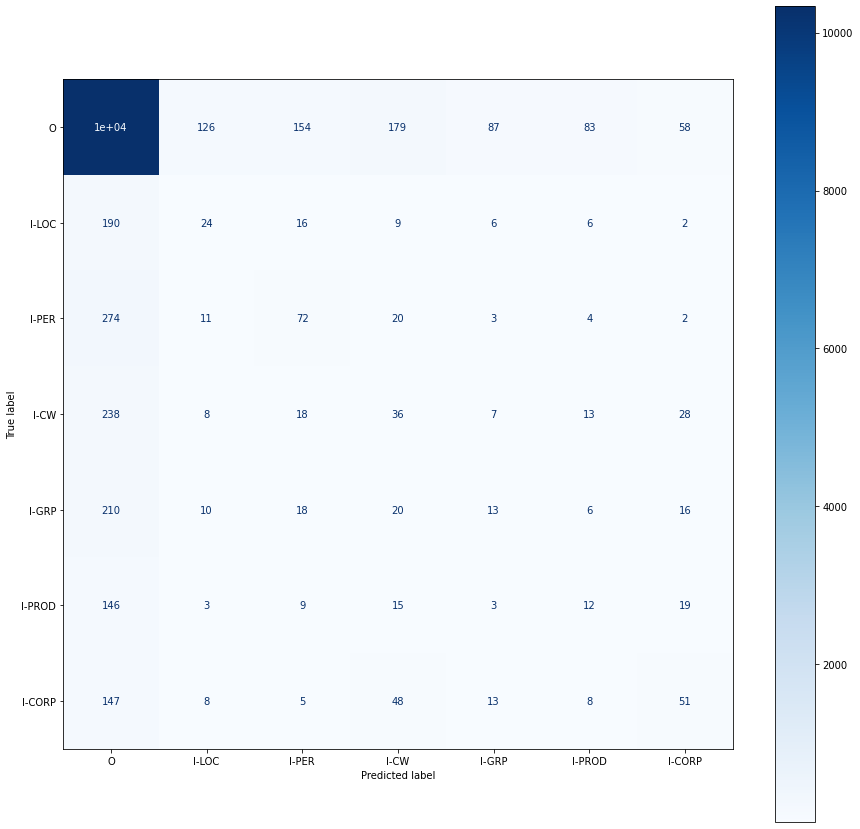

In [251]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=[bio_rev[c] for c in svm_clf.classes_], ax=ax)
plt.show()

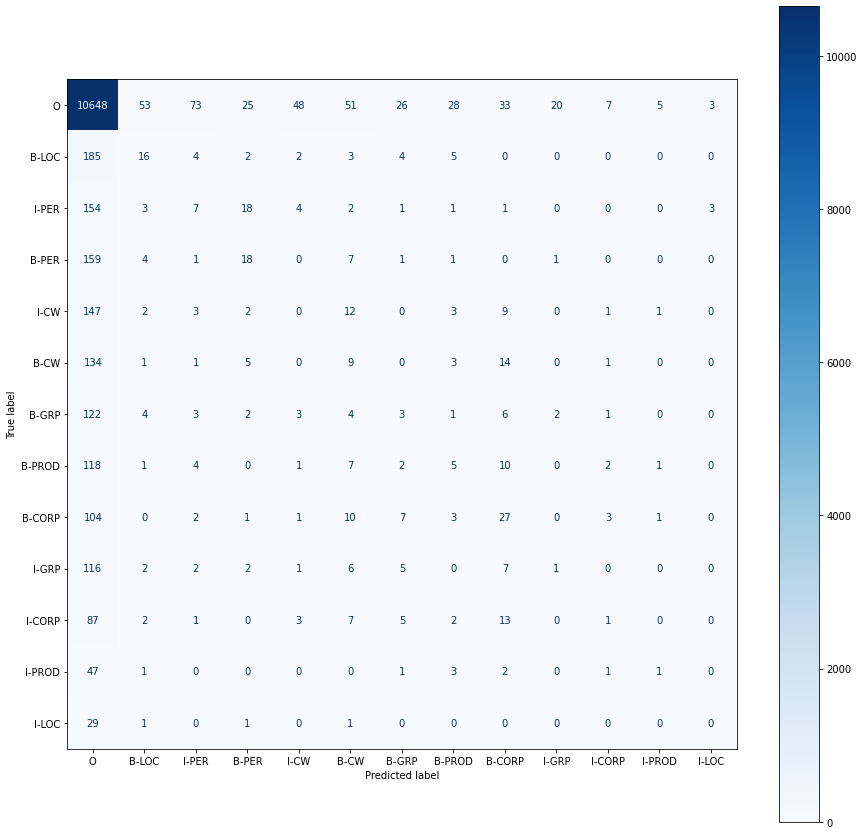

In [425]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=[bio_rev[c] for c in svm_clf.classes_], ax=ax)
plt.show()

In [252]:
print(classification_report(y_test, y_pred, target_names=[bio_rev[c] for c in svm_clf.classes_]))

              precision    recall  f1-score   support

           O       0.90      0.94      0.92     11020
       I-LOC       0.13      0.09      0.11       253
       I-PER       0.25      0.19      0.21       386
        I-CW       0.11      0.10      0.11       348
       I-GRP       0.10      0.04      0.06       293
      I-PROD       0.09      0.06      0.07       207
      I-CORP       0.29      0.18      0.22       280

    accuracy                           0.82     12787
   macro avg       0.27      0.23      0.24     12787
weighted avg       0.79      0.82      0.81     12787



#### **Обучаем seq2seq**

In [18]:
from itertools import chain

def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['words'].to_list()))
    else:
        vocab = list(set(data['markers'].to_list()))
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    idx2tok[len(vocab)] = '<UNKNOWN>'
    idx2tok[len(vocab)+1] = '<PAD>'
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    tok2idx['<UNKNOWN>'] = len(vocab)
    tok2idx['<PAD>'] = len(vocab)+1
    return tok2idx, idx2tok

In [308]:
token2idx, idx2token = get_dict_map(fdf, 'token')
tag2idx, idx2tag = get_dict_map(fdf, 'marker')

In [309]:
# Убираем BIO
tag2idx['I-LOC'] = tag2idx['B-LOC'] = 0
tag2idx['I-PER'] = tag2idx['B-PER'] = 1
tag2idx['I-CORP'] = tag2idx['B-CORP'] = 2
tag2idx['I-PROD'] = tag2idx['B-PROD'] = 3
tag2idx['I-GRP'] = tag2idx['B-GRP'] = 4
tag2idx['I-CW'] = tag2idx['B-CW'] = 5
tag2idx['_ O'] = tag2idx['O'] = 6
tag2idx['<PAD>'] = 7
del tag2idx['<UNKNOWN>']

idx2tag = {0: 'LOC', 1: 'PER', 2: 'CORP', 3: 'PROD', 4: 'GRP', 5: 'CW', 6: 'O', 7: '<PAD>'}

In [310]:
tag2idx

{'B-PER': 1,
 'I-PER': 1,
 'B-LOC': 0,
 'B-CORP': 2,
 'I-LOC': 0,
 'B-GRP': 4,
 'I-CW': 5,
 'B-CW': 5,
 'B-PROD': 3,
 'I-PROD': 3,
 'I-CORP': 2,
 'O': 6,
 'I-GRP': 4,
 '_ O': 6,
 '<PAD>': 7}

In [311]:
idx2tag

{0: 'LOC',
 1: 'PER',
 2: 'CORP',
 3: 'PROD',
 4: 'GRP',
 5: 'CW',
 6: 'O',
 7: '<PAD>'}

In [281]:
with open("z:\\ИТЦ ФАС\\Обучение\\Innopolis Data Science\\From Linux\\innopolis\\DZ_diplom\\token2idx.json", "w", encoding="utf-8") as fp:
    json.dump(token2idx, fp)
    fp.close()

In [282]:
with open("z:\\ИТЦ ФАС\\Обучение\\Innopolis Data Science\\From Linux\\innopolis\\DZ_diplom\\idx2tag.json", "w", encoding="utf-8") as fp:
    json.dump(idx2tag, fp)
    fp.close()

In [283]:
fdf['word_idx'] = fdf['words'].map(token2idx)
fdf['marker_idx'] = fdf['markers'].map(tag2idx)
fdf.head()

,words,markers,sentense_num,word_idx,marker_idx
0,российская,B-GRP,1,9681,4
1,экологическая,I-GRP,1,20293,4
2,партия,I-GRP,1,15291,4
3,«зелёные»,I-GRP,1,38551,4
4,—,O,1,43181,6


In [284]:
# Fill na
data_fillna = fdf.fillna(method='ffill', axis=0)# Groupby and collect columns
data_group = data_fillna.groupby(['sentense_num'],as_index=False)['words', 'markers', 'word_idx', 'marker_idx'].agg(lambda x: list(x))# Visualise data
data_group.head()

C:\Users\eka\AppData\Local\Temp/ipykernel_27932/2381050875.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = data_fillna.groupby(['sentense_num'],as_index=False)['words', 'markers', 'word_idx', 'marker_idx'].agg(lambda x: list(x))# Visualise data


,sentense_num,words,markers,word_idx,marker_idx
0,1,"[российская, экологическая, партия, «зелёные»,...","[B-GRP, I-GRP, I-GRP, I-GRP, O, O, O, O, O, O,...","[9681, 20293, 15291, 38551, 43181, 1596, 30737...","[4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]"
1,2,"[также, посещал, два, семинара, бартольда, кёй...","[O, O, O, O, B-PER, I-PER, O, O, O, B-PER, O, ...","[24008, 47589, 42010, 40044, 31326, 34745, 239...","[6, 6, 6, 6, 1, 1, 6, 6, 6, 1, 6, 1, 6]"
2,3,"[в, 1999, —, 2006, играла, за, национальную, с...","[O, O, O, O, O, O, B-GRP, I-GRP, I-GRP, O]","[26415, 3416, 43181, 37240, 37335, 27712, 2989...","[6, 6, 6, 6, 6, 6, 4, 4, 4, 6]"
3,4,"[«, джульетта, », —, кинофильм, 2016, года, ис...","[O, B-CW, O, O, O, O, O, O, O, O, O, O, O, O]","[49441, 13541, 3797, 43181, 7570, 32408, 34363...","[6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]"
4,5,"[мякоть, спелого, плода, съедобна, в, свежем, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-P...","[43136, 34860, 13361, 5001, 26415, 29718, 1827...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6]"


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow_hub as hub

In [26]:
print(tf.__version__)

2.7.0


In [27]:
fmaxlen = max([len(s) for s in data_group['word_idx'].tolist()])

In [170]:
fmaxlen

59

In [285]:
def get_pad_train_test_val(data_group, data, atag2idx, atoken2idx, maxlen):

    #Pad tokens (X var)    
    tokens = data_group['word_idx'].tolist()
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= atoken2idx['<PAD>'])

    #Pad Tags (y var) and convert it into one hot encoding
    tags = data_group['marker_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= atag2idx['<PAD>'])
    n_tags = len(set(tag2idx.values()))
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    return pad_tokens, pad_tags

In [286]:
X, y = get_pad_train_test_val(data_group, fdf, tag2idx, token2idx, fmaxlen)

In [287]:
#Split train and validation if atrain:
train_tokens, val_tokens, train_tags, val_tags = train_test_split(X, y, test_size = 0.2,train_size =0.8, random_state=2020)
print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tags length:', len(train_tags),
        '\nval_tokens:', len(val_tokens),
        '\nval_tags:', len(val_tags),
    )

train_tokens length: 12240 
train_tags length: 12240 
val_tokens: 3060 
val_tags: 3060


**Тестовый датасет**

In [288]:
fdf_test['word_idx'] = fdf_test['words'].map(token2idx)
fdf_test['marker_idx'] = fdf_test['markers'].map(tag2idx)
fdf_test.head()

,words,markers,sentense_num,word_idx,marker_idx
0,важным,O,1,31252.0,6
1,традиционным,O,1,35479.0,6
2,промыслом,O,1,NaN,6
3,является,O,1,49499.0,6
4,производство,O,1,42625.0,6


In [289]:
# Fill na
data_fillna = fdf_test.fillna(value = token2idx['<UNKNOWN>'], axis=0)# Groupby and collect columns
data_group_test = data_fillna.groupby(['sentense_num'],as_index=False)['words', 'markers', 'word_idx', 'marker_idx'].agg(lambda x: list(x))# Visualise data
data_group_test.head()

C:\Users\eka\AppData\Local\Temp/ipykernel_27932/1157314373.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group_test = data_fillna.groupby(['sentense_num'],as_index=False)['words', 'markers', 'word_idx', 'marker_idx'].agg(lambda x: list(x))# Visualise data


,sentense_num,words,markers,word_idx,marker_idx
0,1,"[важным, традиционным, промыслом, является, пр...","[O, O, O, O, O, B-PROD, I-PROD, O]","[31252.0, 35479.0, 52566.0, 49499.0, 42625.0, ...","[6, 6, 6, 6, 6, 3, 3, 6]"
1,2,"[он, вышел, в, нескольких, томах, между, 1838,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[51862.0, 24118.0, 26415.0, 43575.0, 8661.0, 2...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
2,3,"[специальный, агент, секретной, службы, сша, д...","[O, O, B-GRP, I-GRP, I-GRP, O, O, O, O, O, O, ...","[20266.0, 327.0, 50907.0, 30058.0, 26699.0, 52...","[6, 6, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
3,4,"[несколько, ценных, замечаний, по, теме, прина...","[O, O, O, O, O, O, B-PER, I-PER, O, O, O, O, O...","[50500.0, 14166.0, 52566.0, 23953.0, 20153.0, ...","[6, 6, 6, 6, 6, 6, 1, 1, 6, 6, 6, 6, 6, 5, 6, ..."
4,5,"[в, 2007, году, было, подписано, соглашение, с...","[O, O, O, O, O, O, O, O, B-CORP, I-CORP, O]","[26415.0, 51752.0, 8051.0, 48100.0, 31282.0, 4...","[6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6]"


In [290]:
test_tokens, test_tags = get_pad_train_test_val(data_group_test, fdf_test, tag2idx, token2idx, fmaxlen)

In [61]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda
from tensorflow.keras.utils import plot_model

In [35]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [291]:
input_dim = len(set(fdf['words'].to_list()))+2
output_dim = 300
input_length = max([len(s) for s in data_group['word_idx'].tolist()])
n_tags = len(idx2tag)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  52568 
output_dim:  300 
input_length:  59 
n_tags:  8


In [292]:
nlp = spacy.load("ru_core_news_lg")

In [293]:
embedding_matrix = np.zeros((input_dim, output_dim))
for word, i in tqdm(token2idx.items()):
    for doc in nlp.pipe(word, disable=["tagger", "parser", "attribute_ruler", "lemmatizer", "ner"]):
        if doc[0].vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = doc[0].vector

100%|█████████████████████████████████████████████████████████████████████████████████████████| 52568/52568 [04:49<00:00, 181.54it/s]


In [115]:
def get_bilstm_lstm_model(alr):
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, weights = [embedding_matrix]))

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.9), merge_mode = 'concat')) #, recurrent_dropout=0.2

    # Add LSTM
    #model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="softmax")))

    #Optimiser 
    # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
    loptimizer = tensorflow.keras.optimizers.Adam(learning_rate=alr)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=loptimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [116]:
def plot_loss_acc(model_name, history, gparams):
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']
    epochs = range(1, len(loss_values)+1)
    
    plt.figure(figsize=(12,7))
    plt.subplot(121)
    plt.title(model_name + gparams)
    plt.plot(epochs, loss_values, label='Training Loss')
    plt.plot(epochs, val_loss_values, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.title(model_name + gparams)
    plt.plot(epochs, acc_values, label='Accuracy')
    plt.plot(epochs, val_acc_values, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [294]:
np.array(train_tags).shape

(12240, 59, 8)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 59, 300)           15770400  
                                                                 
 bidirectional_3 (Bidirectio  (None, 59, 600)          1442400   
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 59, 8)            4808      
 tributed)                                                       
                                                                 
Total params: 17,217,608
Trainable params: 17,217,608
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
153/153 [==============================] - 216s 1s/step - loss: 0.2382 - accuracy: 0.9507 - val_loss: 0.1481 - val_accuracy: 0.9623
Epoch 2/20
153/153 [===========

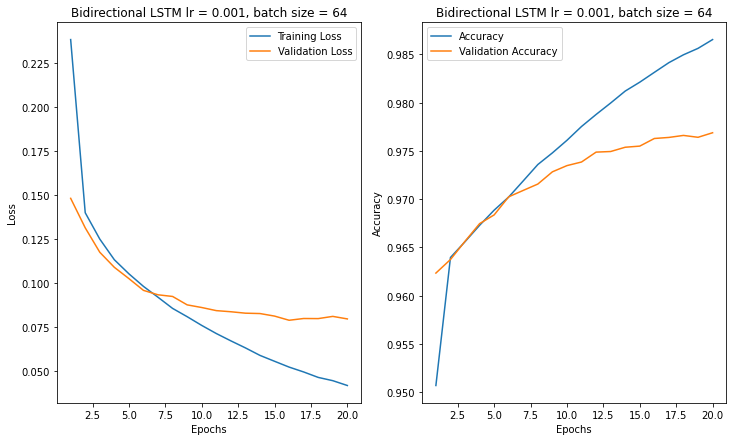

In [295]:
fbatch_size = 64
fepochs = 20
fvalidation_split = 0.2
flearning_rate = 0.001
model_bilstm_lstm = get_bilstm_lstm_model(flearning_rate)
hist = model_bilstm_lstm.fit(train_tokens, np.array(train_tags), batch_size=fbatch_size, verbose=1, epochs=fepochs, validation_split=fvalidation_split)
plot_loss_acc('Bidirectional LSTM', hist, ' lr = ' + str(flearning_rate) + ', batch size = ' + str(fbatch_size))

In [166]:
fepochs = 9999

Epoch 1/9999
153/153 [==============================] - 196s 1s/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 2/9999
153/153 [==============================] - 198s 1s/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 3/9999
153/153 [==============================] - 200s 1s/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 4/9999
153/153 [==============================] - 197s 1s/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0817 - val_accuracy: 0.9776
Epoch 5/9999
153/153 [==============================] - 197s 1s/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0835 - val_accuracy: 0.9775
Epoch 6/9999
153/153 [==============================] - 195s 1s/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0832 - val_accuracy: 0.9772
Epoch 7/9999
153/153 [==============================] - 198s 1s/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0836 - val_ac

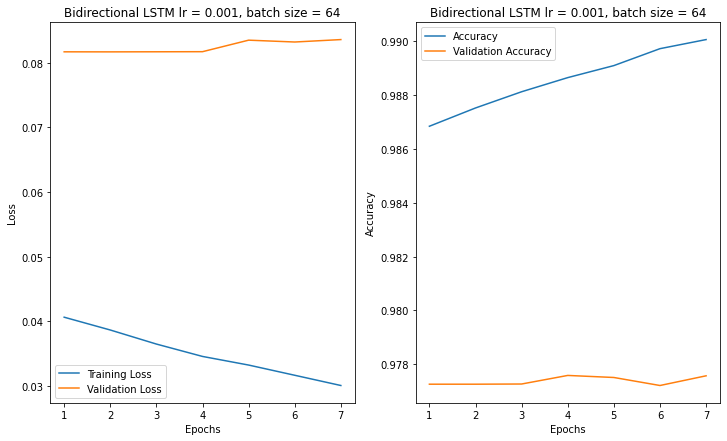

In [167]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
hist = model_bilstm_lstm.fit(train_tokens, np.array(train_tags), batch_size=fbatch_size, verbose=1, epochs=fepochs, validation_split=fvalidation_split, callbacks=[callback])
plot_loss_acc('Bidirectional LSTM', hist, ' lr = ' + str(flearning_rate) + ', batch size = ' + str(fbatch_size))

In [169]:
model_bilstm_lstm.save('z:\\ИТЦ ФАС\\Обучение\\Innopolis Data Science\\From Linux\\innopolis\\DZ_diplom\\model_bilstm_lstm.h5', save_format = 'h5', include_optimizer=True)

In [143]:
score = model_bilstm_lstm.evaluate(val_tokens, np.array(val_tags))
print('Test score:', score[0])
print('Test accuracy:', score[1])

96/96 [==============================] - 26s 270ms/step - loss: 0.0791 - accuracy: 0.9768
Test score: 0.07912860810756683
Test accuracy: 0.9768306016921997


In [144]:
np.array(test_tokens).shape

(800, 59)

In [145]:
np.array(val_tokens).shape

(3060, 59)

In [146]:
score = model_bilstm_lstm.evaluate(test_tokens, np.array(test_tags))
print('Test score:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 8s 282ms/step - loss: 0.0943 - accuracy: 0.9744
Test score: 0.09428895264863968
Test accuracy: 0.9744279384613037


In [313]:
y_pred = model_bilstm_lstm.predict(test_tokens)

In [269]:
def onehot2arr(ay):
    llist = []
    for sent in ay:
        llist = llist + np.argmax(sent, axis = 1).tolist()
    #llist = list(filter(lambda x: x!=7, llist))
    return np.array(llist)

In [297]:
accuracy_score(onehot2arr(y_pred), onehot2arr(test_tags))

0.9731779661016949

In [150]:
def onehot2sent(apred, atest):
    llist = []
    for i in range(len(apred)):
        llist.append(all(np.argmax(atest[i], axis = 1) == np.argmax(apred[i], axis = 1)))
    return llist

In [272]:
list(filter(lambda x: x!='<UNKNOWN>', idx2tag.values()))

['LOC', 'PER', 'CORP', 'PROD', 'GRP', 'CW', 'O', '<PAD>']

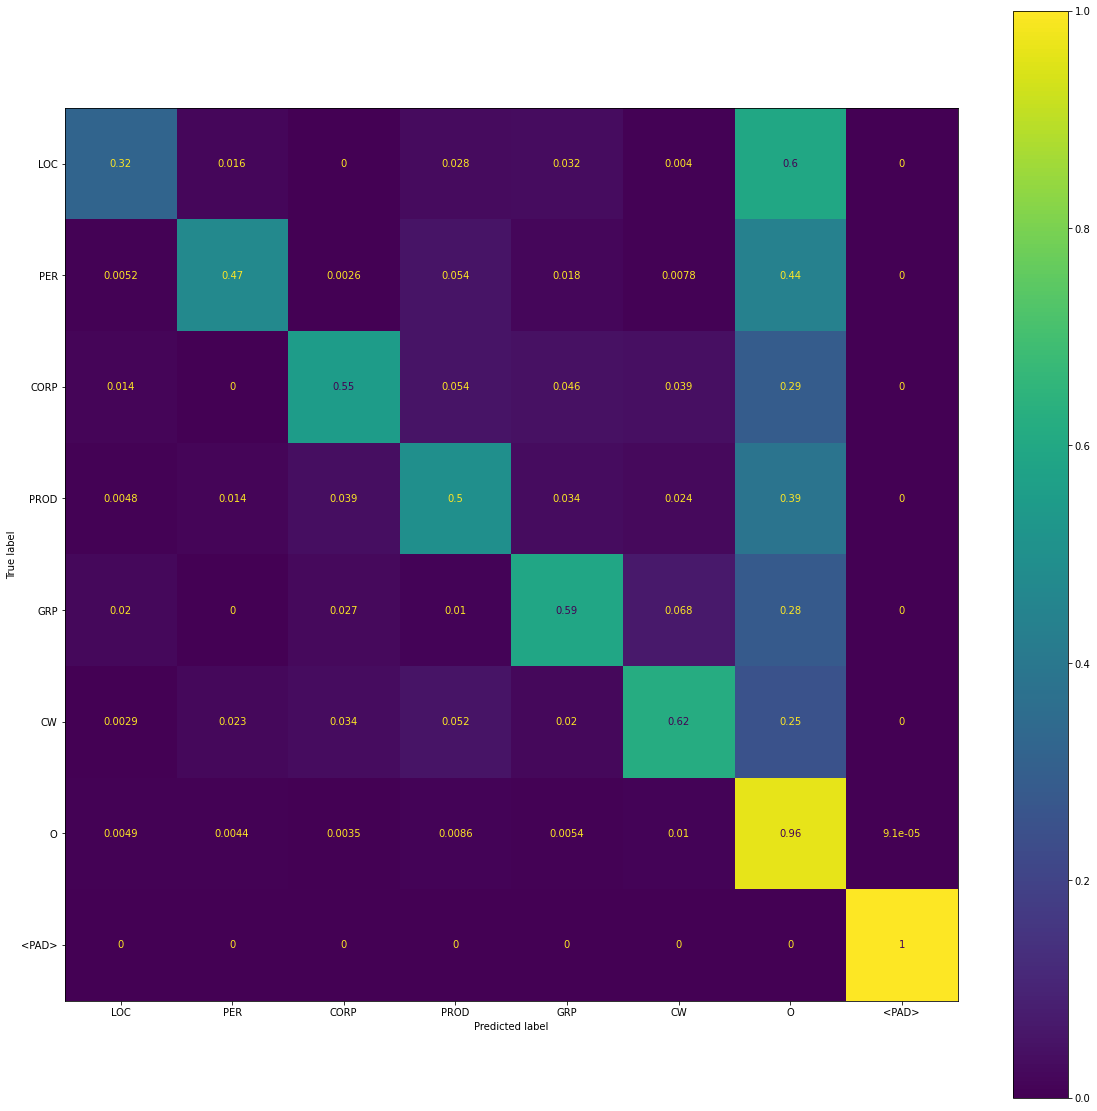

In [316]:
cm = confusion_matrix(onehot2arr(test_tags), onehot2arr(y_pred), labels=list(idx2tag.keys()))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, 
                               display_labels=list(idx2tag.values()))
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)
plt.show()

In [315]:
print(classification_report(onehot2arr(test_tags), onehot2arr(y_pred), labels = list(idx2tag.keys()), target_names=list(idx2tag.values())))

              precision    recall  f1-score   support

         LOC       0.55      0.32      0.41       253
         PER       0.74      0.47      0.58       386
        CORP       0.70      0.55      0.62       280
        PROD       0.39      0.50      0.44       207
         GRP       0.63      0.59      0.61       293
          CW       0.59      0.62      0.60       348
           O       0.94      0.96      0.95     11020
       <PAD>       1.00      1.00      1.00     34413

    accuracy                           0.97     47200
   macro avg       0.69      0.63      0.65     47200
weighted avg       0.97      0.97      0.97     47200



In [300]:
lsent = onehot2sent(y_pred, test_tags)

In [301]:
print(len(list(filter(lambda x: x==True, lsent))), len(lsent), len(list(filter(lambda x: x==True, lsent)))/len(lsent)*100)

226 800 28.249999999999996


In [212]:
len(lsent)

800

In [213]:
for idx, val in enumerate(lsent):
    if val:
        print(' '.join(data_group_test.loc[idx, ['words']][0]))
        print(' '.join(data_group_test.loc[idx, ['markers']][0]))

важным традиционным промыслом является производство пальмового масла .
O O O O O B-PROD I-PROD O
в 2007 году было подписано соглашение с компанией red bull .
O O O O O O O O B-CORP I-CORP O
оператором месторождения является компания woodside petroleum .
O O O O B-CORP I-CORP O
• клэр фой — « корона » ( за роль елизаветы ii )
O B-PER I-PER O O B-CW O O O O B-PER I-PER O
« шесть » — фильм 2004 года , рассказывающий о последних днях перед армагеддоном и диктаторе антихристе .
O B-CW O O O O O O O O O O O O O O O O
в 1801 — 1803 годах мария жила в париж , где копировала картины старых мастеров в лувр для последующего их использования в преподавании в англии .
O O O O O O O O B-LOC O O O O O O O B-LOC O O O O O O O O O
• рут гордон — « гарольд и мод » ( за роль мод )
O B-PER I-PER O O B-CW I-CW I-CW O O O O O O
с 2009 года наставник работает в системе кайрата .
O O O O O O O B-GRP O
первоначально являлся армейским вариантом mitsubishi jeep .
O O O O B-PROD I-PROD O
русский гофманист в. ф. о

In [317]:
y_pred = model_bilstm_lstm.predict(val_tokens)

In [318]:
accuracy_score(onehot2arr(y_pred), onehot2arr(val_tags))

0.976747535172261

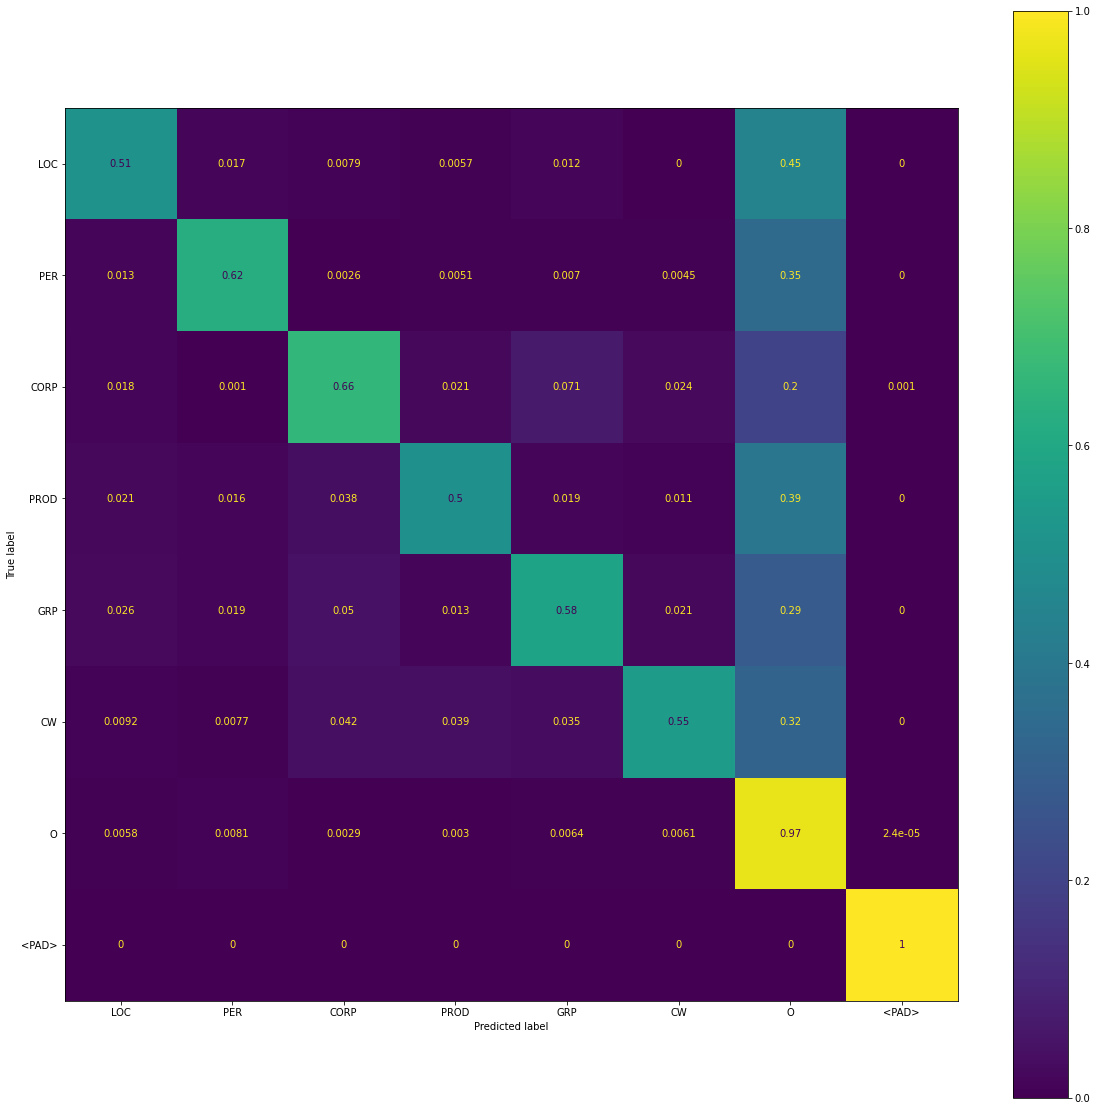

In [319]:
cm = confusion_matrix(onehot2arr(val_tags), onehot2arr(y_pred), labels=list(idx2tag.keys()))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, 
                               display_labels=list(idx2tag.values()))
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)
plt.show()

In [305]:
lsent = onehot2sent(y_pred, val_tags)

In [306]:
print(classification_report(onehot2arr(val_tags), onehot2arr(y_pred), labels = list(idx2tag.keys()), target_names=list(idx2tag.values())))

C:\Python\ENV\innopolis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\ENV\innopolis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\ENV\innopolis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\ENV\innopolis\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

         LOC       0.57      0.51      0.54       883
         PER       0.71      0.62      0.66      1568
        CORP       0.70      0.66      0.68       953
        PROD       0.64      0.50      0.56       822
         GRP       0.63      0.58      0.60      1212
          CW       0.69      0.55      0.61      1300
           O       0.95      0.97      0.96     41730
       <PAD>       0.00      0.00      0.00         0

   micro avg       0.91      0.91      0.91     48468
   macro avg       0.61      0.55      0.58     48468
weighted avg       0.91      0.91      0.91     48468



C:\Python\ENV\innopolis\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
print(len(list(filter(lambda x: x==True, lsent))), len(lsent), len(list(filter(lambda x: x==True, lsent)))/len(lsent)*100)

1132 3060 36.993464052287585


In [161]:
ls = u'Российская экологическая партия «Зелёные» — до февраля 2012 года, входила в состав партии СР.'

In [162]:
def get_tokens(asent, atoken2idx, maxlen):
    
    ldoc = ltokenize(asent)
    #get max token and tag length
    ltokens = [str(x).lower() for x in ldoc]
    itokens = []    
    #Pad tokens (X var)
    for s in ltokens:
        if s in atoken2idx:
            itokens.append(atoken2idx[s])
        else:
            itokens.append(atoken2idx['<UNKNOWN>'])
    pad_tokens = pad_sequences([itokens], maxlen=maxlen, dtype='int32', padding='post', value=atoken2idx['<PAD>'])
   
    return pad_tokens

In [163]:
ftokens = get_tokens(ls, token2idx, fmaxlen)

Российская ADJ amod
экологическая ADJ amod
партия NOUN nsubj
« PUNCT punct
Зелёные ADJ appos
» PUNCT punct
— PUNCT punct
до ADP case
февраля NOUN parataxis
2012 ADJ amod
года NOUN nmod
, PUNCT punct
входила VERB ROOT
в ADP case
состав NOUN obl
партии NOUN nmod
СР. PROPN appos


In [164]:
y_pred = model_bilstm_lstm.predict(ftokens)

In [165]:
print([idx2tag[i] for i in onehot2arr(y_pred)])

['O', 'GRP', 'GRP', 'O', 'GRP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
